<a href="https://colab.research.google.com/github/ctalamilla/preprocessing-ml/blob/main/tf_02CristianSalinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

# **Trabajo Final - Módulo 5 - Aprendizaje Automático - Machine Learning**

![logo](https://www.python.org/static/community_logos/python-powered-w-100x40.png)

~~~
Autor: Cristian Salinas Talamilla
~~~

# **Aclaraciones previas**



*   En cada celda se indica lo solicitado.
*   Se pueden generar la cantidad de scripts necesarios.
*   Puede explicar insertando celdas de texto.
*   Para graficar se puede utilizar cualquier librería.
*   Al finalizar, descargar el archivo y entregarlo por el campus.
*   Al finalizar se debería borrar esta celda.


# **Carga de módulos y datos necesarios**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# **Creación del DataFrame**

In [ ]:
url="https://raw.githubusercontent.com/cristiandarioortegayubro/Maestria-Ciencia-de-Datos-UBA-FCE/main/Gestion_y_Procesamiento_BD/"
archivo="bank-full.csv"
analisis = pd.read_csv(url+archivo)
analisis.replace({"unknown": np.nan}, inplace=True)

A continuación se observan las variables o features del dataset. Se lo hace de manera transpuesta para ver la cantidad de variables en forma de filas.

In [ ]:
analisis.head(5).T.reset_index()

,index,0,1,2,3,4
0,age,58,44,33,47,33
1,job,management,technician,entrepreneur,blue-collar,NaN
2,marital,married,single,married,married,single
3,education,tertiary,secondary,secondary,NaN,NaN
4,default,no,no,no,no,no
5,balance,2143,29,2,1506,1
6,housing,yes,yes,yes,yes,no
7,loan,no,no,yes,no,no
8,contact,NaN,NaN,NaN,NaN,NaN
9,day,5,5,5,5,5


# **Análisis Exploratorio de los datos**

## Tipos de datos

In [ ]:
analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
### numerical
numerical_cols = list(analisis.select_dtypes(exclude=['object']))
numerical_cols


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
### categorical
category_cols = list(analisis.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

## Variables y tipologia de las mismas:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric).

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact).

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).

14 - previous: number of contacts performed before this campaign and for this client (numeric).

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success').


In [ ]:
for i in analisis.columns:
  print('=='*20)
  print("Columna: " + i)
  print(analisis[i].unique())
  print("Nulos: " + str(analisis[i].isnull().sum()))
  print('=='*20)

Columna: age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
Nulos: 0
Columna: job
['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
Nulos: 288
Columna: marital
['married' 'single' 'divorced']
Nulos: 0
Columna: education
['tertiary' 'secondary' nan 'primary']
Nulos: 1857
Columna: default
['no' 'yes']
Nulos: 0
Columna: balance
[ 2143    29     2 ...  8205 14204 16353]
Nulos: 0
Columna: housing
['yes' 'no']
Nulos: 0
Columna: loan
['no' 'yes']
Nulos: 0
Columna: contact
[nan 'cellular' 'telephone']
Nulos: 13020
Columna: day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
Nulos: 0
Columna: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

## Dimensión del conjunto de datos y valores nulos y faltantes

In [ ]:
print(f'Filas: {analisis.shape[0]}, Columnas: {analisis.shape[1]}')

Filas: 45211, Columnas: 17


### Valores Nulos

In [ ]:
nulos = analisis.isnull().sum().sort_values(ascending=False)
nulos

poutcome     36959
contact      13020
education     1857
job            288
month            0
previous         0
pdays            0
campaign         0
duration         0
age              0
day              0
loan             0
housing          0
balance          0
default          0
marital          0
y                0
dtype: int64

<Axes: >

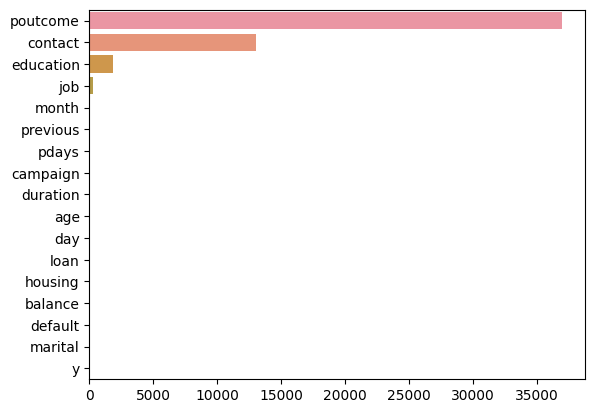

In [ ]:
sns.barplot(x= nulos.values, y= nulos.index)

## Visualización del conjunto de datos

### Categoricas

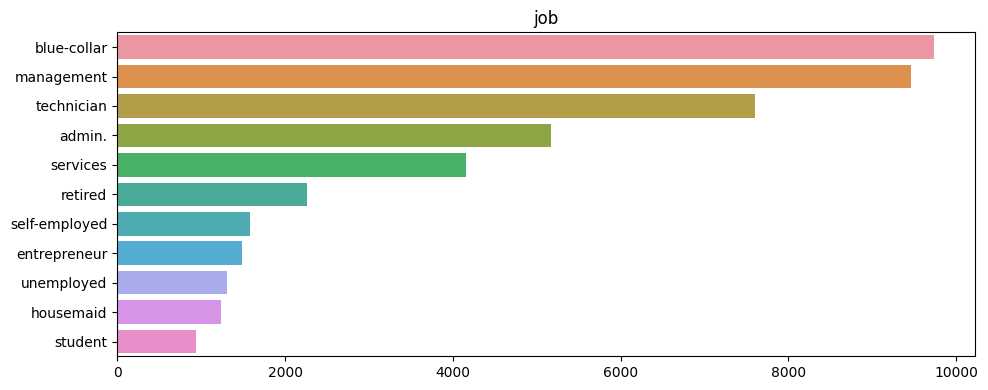

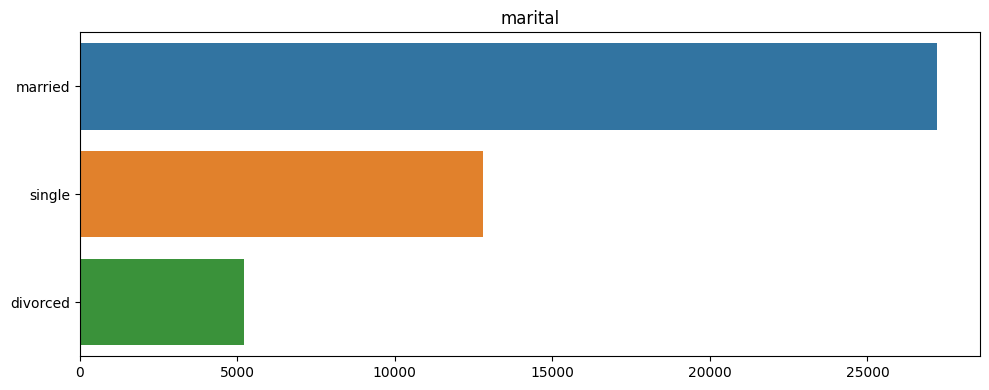

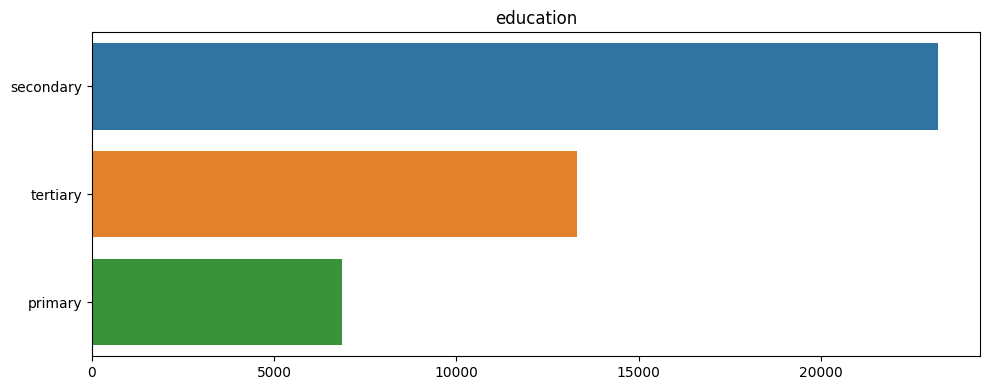

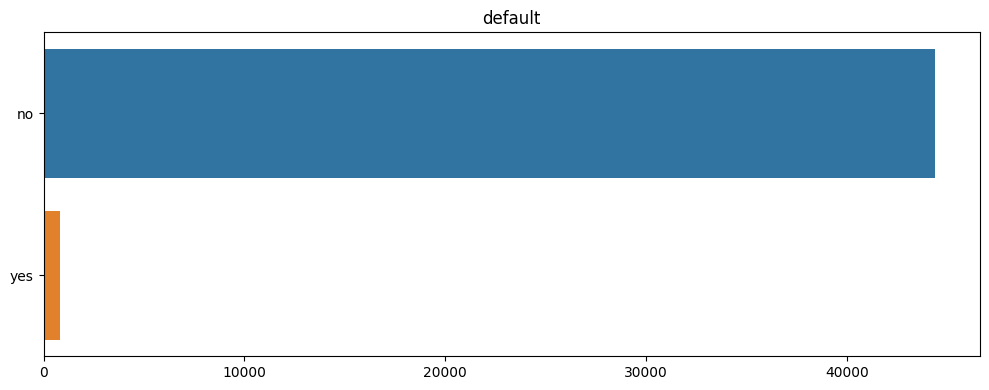

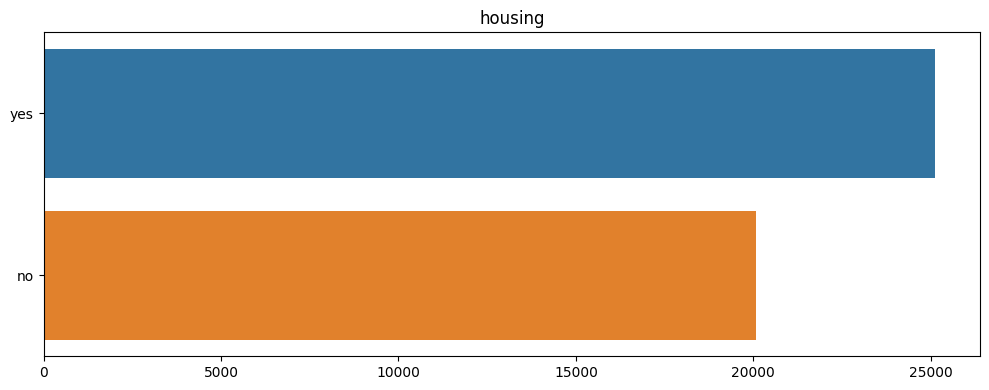

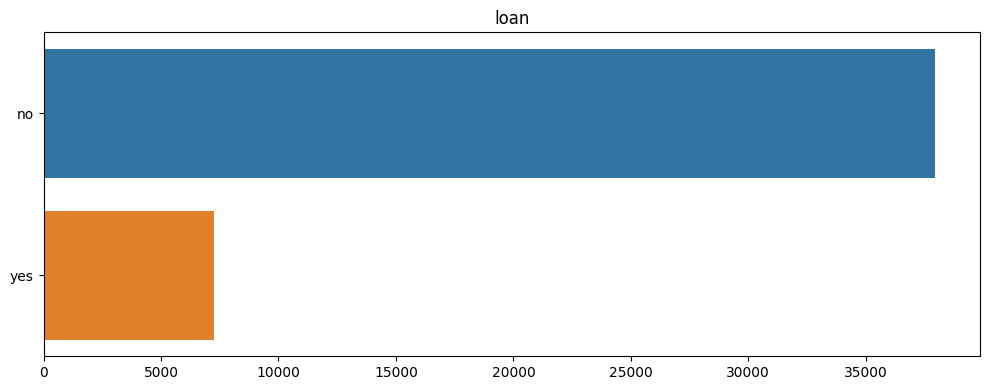

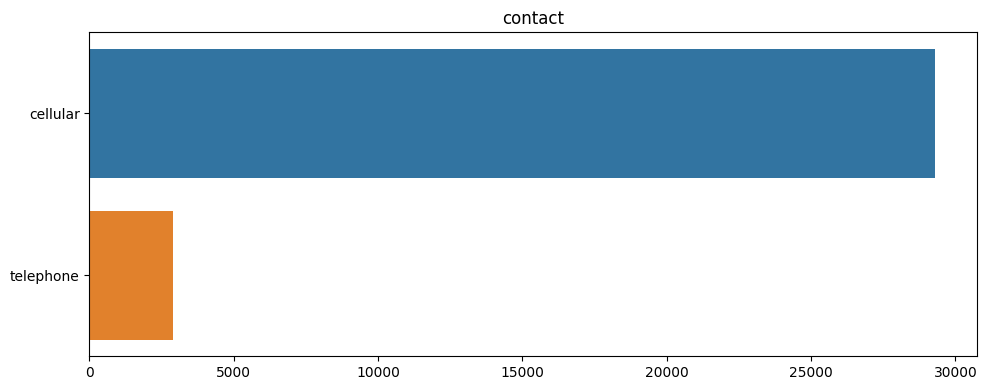

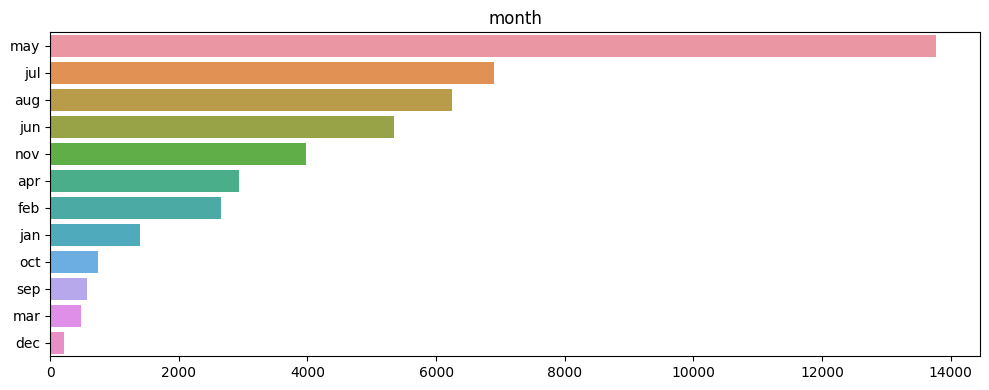

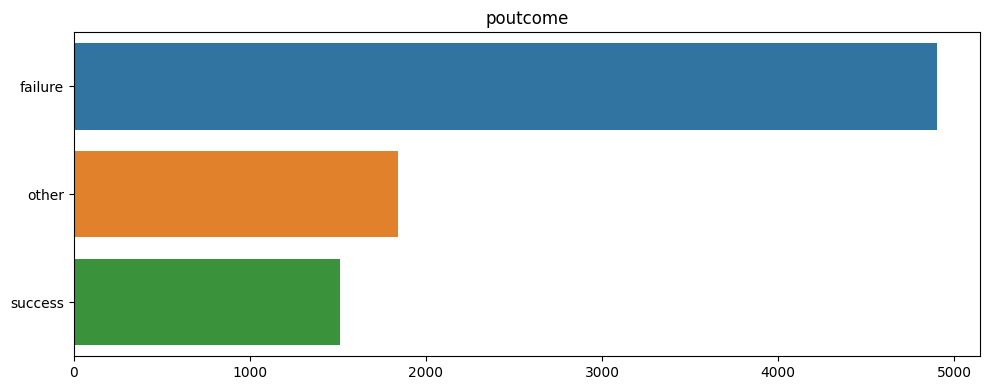

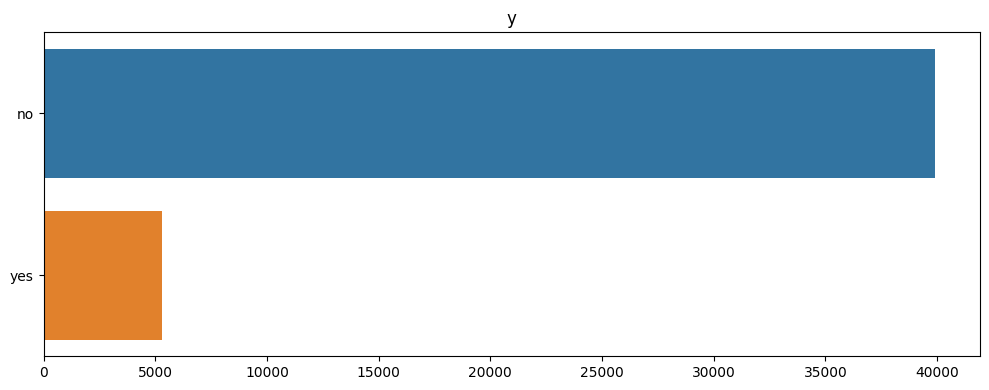

In [ ]:
for col in category_cols:

    plt.figure(figsize=(10,4))
    sns.barplot(x = analisis[col].value_counts().values,
                y = analisis[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()


### Numericas

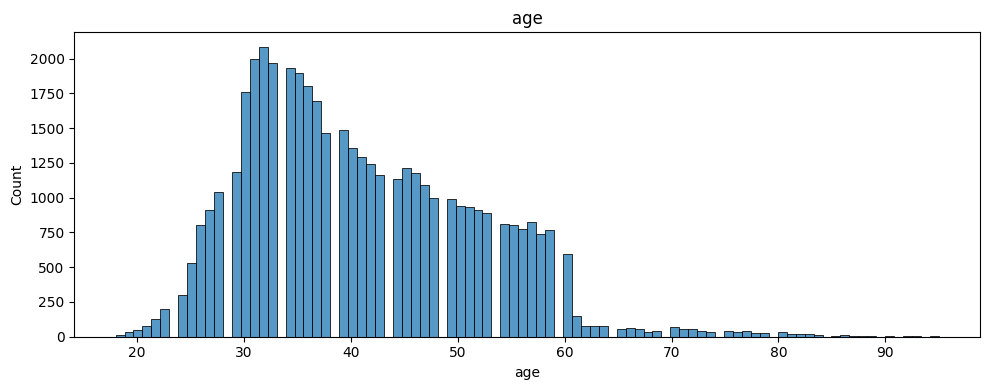

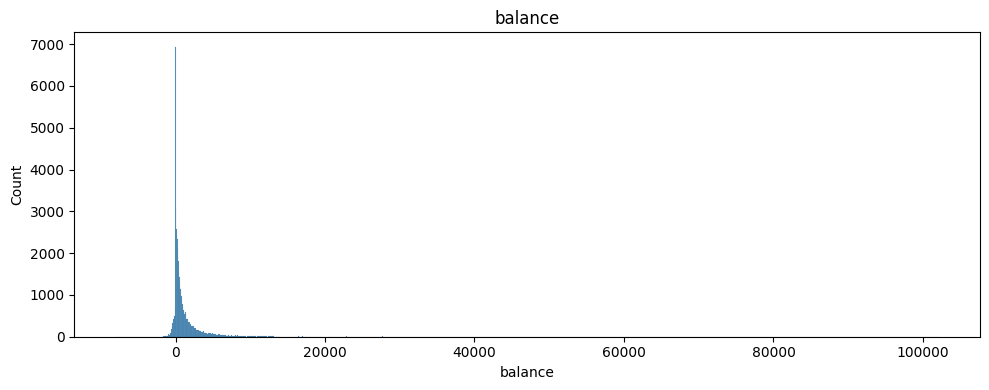

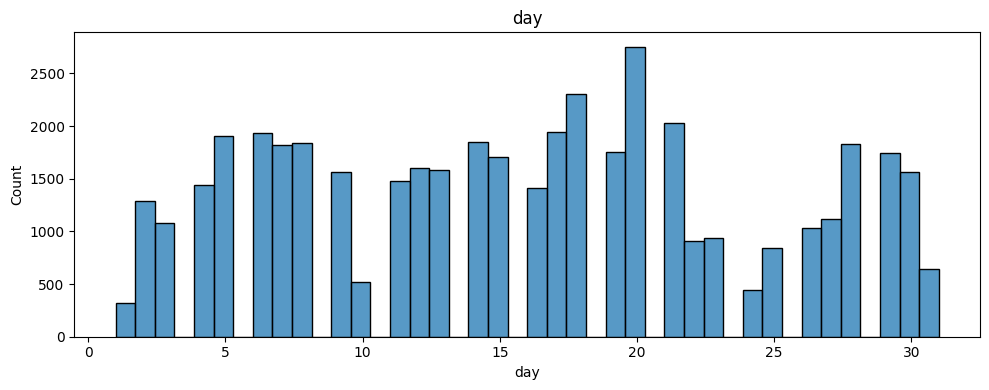

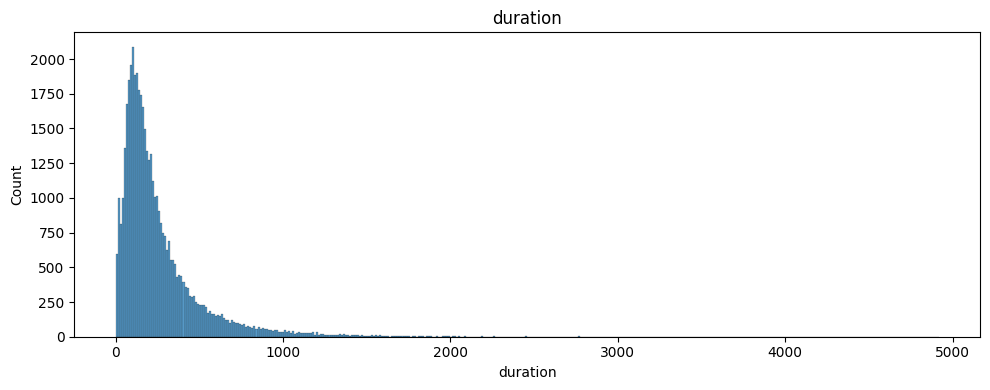

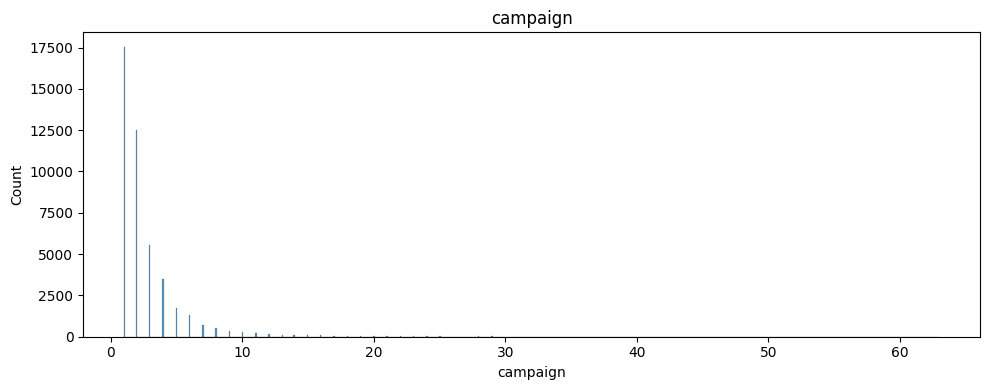

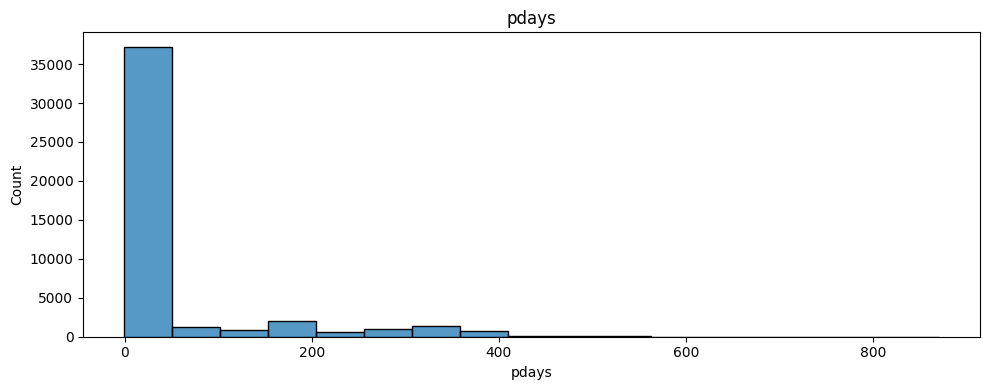

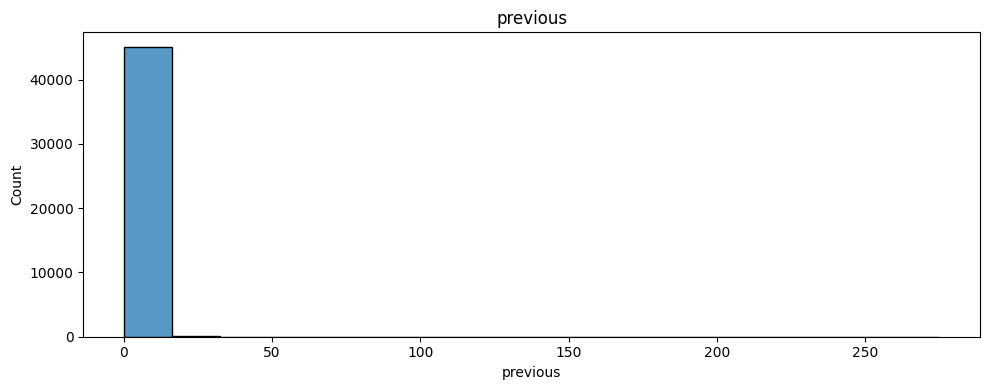

In [ ]:
for col in numerical_cols:

    plt.figure(figsize=(10,4))
    sns.histplot(x = analisis[col])
    plt.title(col)
    plt.tight_layout()

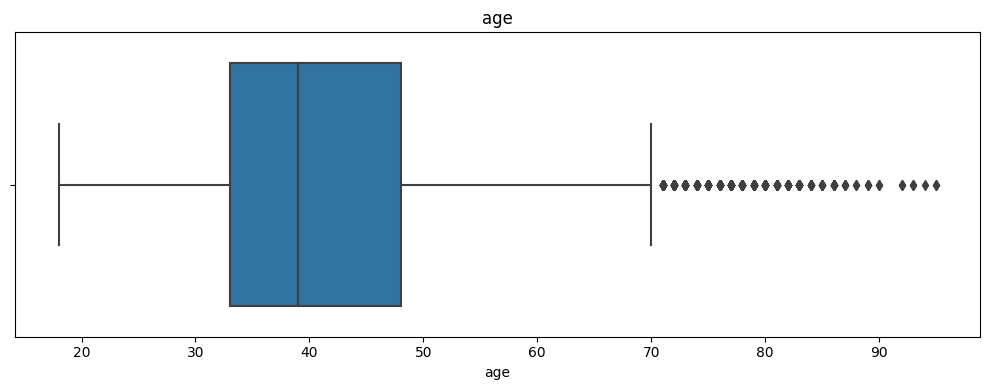

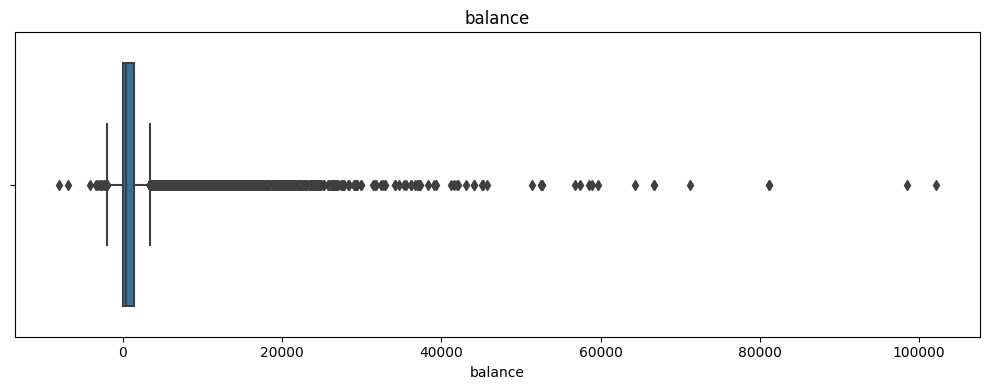

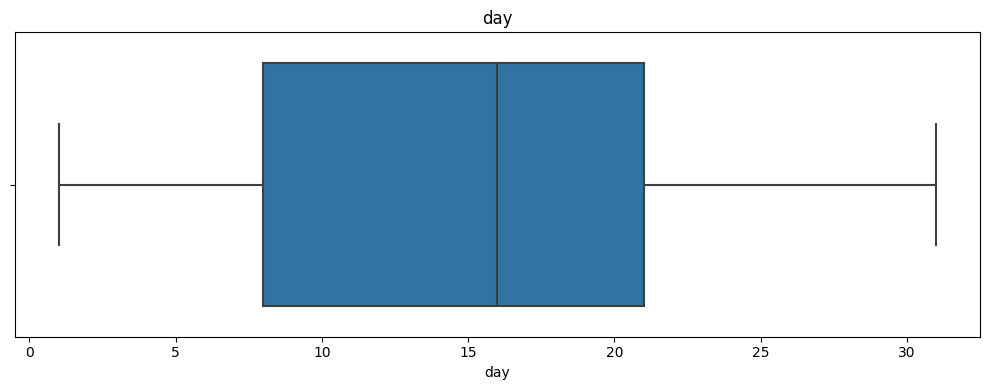

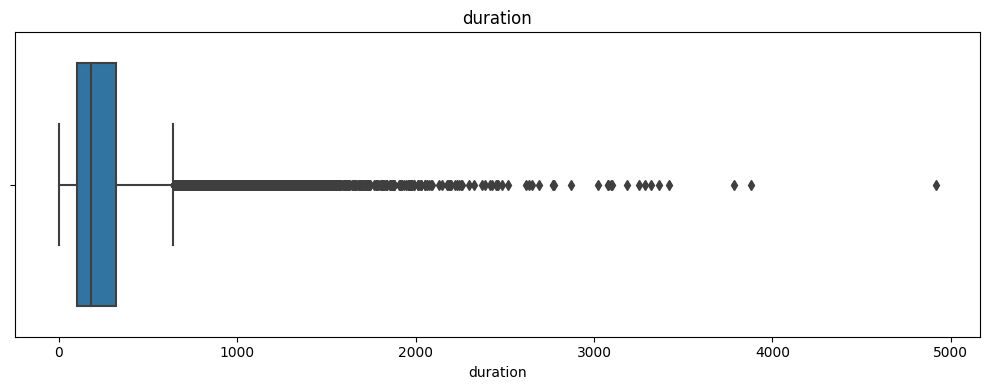

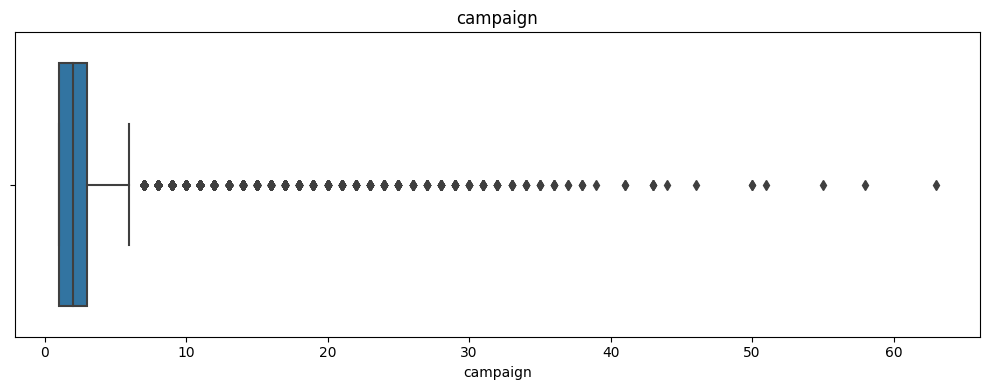

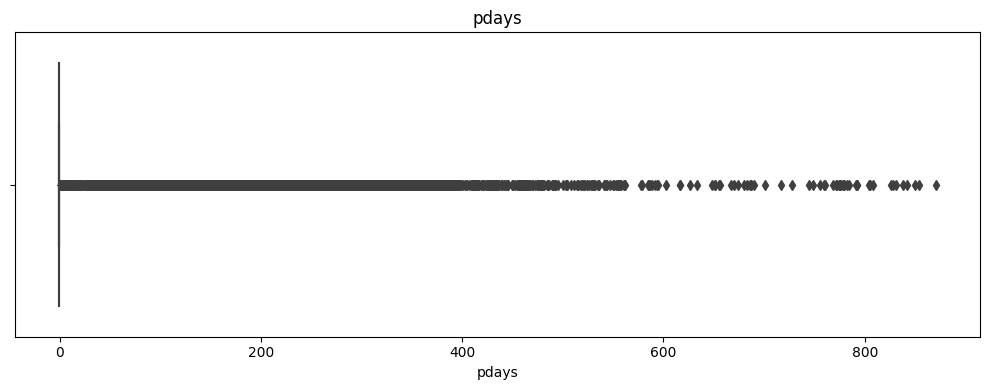

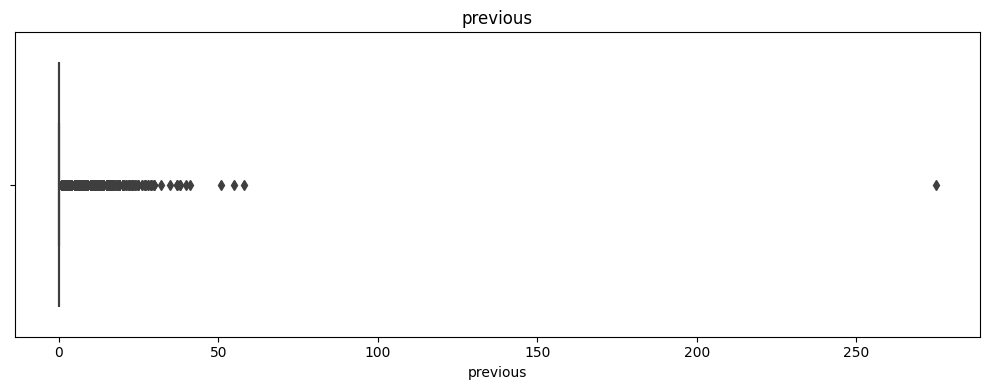

In [ ]:
for col in numerical_cols:

    plt.figure(figsize=(10,4))
    sns.boxplot(x = analisis[col])
    plt.title(col)
    plt.tight_layout()

## Variables numéricas, análisis descriptivo

In [ ]:
for col in numerical_cols:
  print(20*'=')
  print(f'Variable: {col}')
  a = analisis[col].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.9])
  print(a)
  print(20*'=')


Variable: age
count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
10%         29.000000
25%         33.000000
50%         39.000000
75%         48.000000
90%         56.000000
max         95.000000
Name: age, dtype: float64
Variable: balance
count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
10%           0.000000
25%          72.000000
50%         448.000000
75%        1428.000000
90%        3574.000000
max      102127.000000
Name: balance, dtype: float64
Variable: day
count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
10%          5.000000
25%          8.000000
50%         16.000000
75%         21.000000
90%         28.000000
max         31.000000
Name: day, dtype: float64
Variable: duration
count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
10%         58.000000
25%        103.000000
50%        180.000000
75%        319.000000
90%    

## Otras variables, análisis descriptivo

In [ ]:
for col in category_cols:
  print(20*'=')
  print(f'Variable: {col}')
  a = analisis[col].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.9])
  print(a)
  print(20*'=')

Variable: job
count           44923
unique             11
top       blue-collar
freq             9732
Name: job, dtype: object
Variable: marital
count       45211
unique          3
top       married
freq        27214
Name: marital, dtype: object
Variable: education
count         43354
unique            3
top       secondary
freq          23202
Name: education, dtype: object
Variable: default
count     45211
unique        2
top          no
freq      44396
Name: default, dtype: object
Variable: housing
count     45211
unique        2
top         yes
freq      25130
Name: housing, dtype: object
Variable: loan
count     45211
unique        2
top          no
freq      37967
Name: loan, dtype: object
Variable: contact
count        32191
unique           2
top       cellular
freq         29285
Name: contact, dtype: object
Variable: month
count     45211
unique       12
top         may
freq      13766
Name: month, dtype: object
Variable: poutcome
count        8252
unique          3
top       f

## Variable Objetivo

In [ ]:
analisis['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

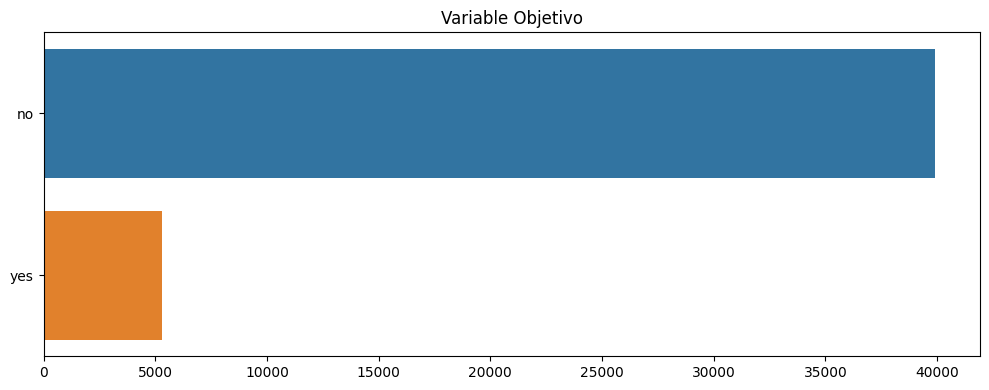

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x = analisis['y'].value_counts().values,
            y = analisis['y'].value_counts().index)
plt.title('Variable Objetivo')
plt.tight_layout()

## Correlación de variables

<ipython-input-77-aefb3bc3541b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(analisis.corr(), annot=True,cmap='viridis',linewidths=0.5,ax=ax)


<Axes: >

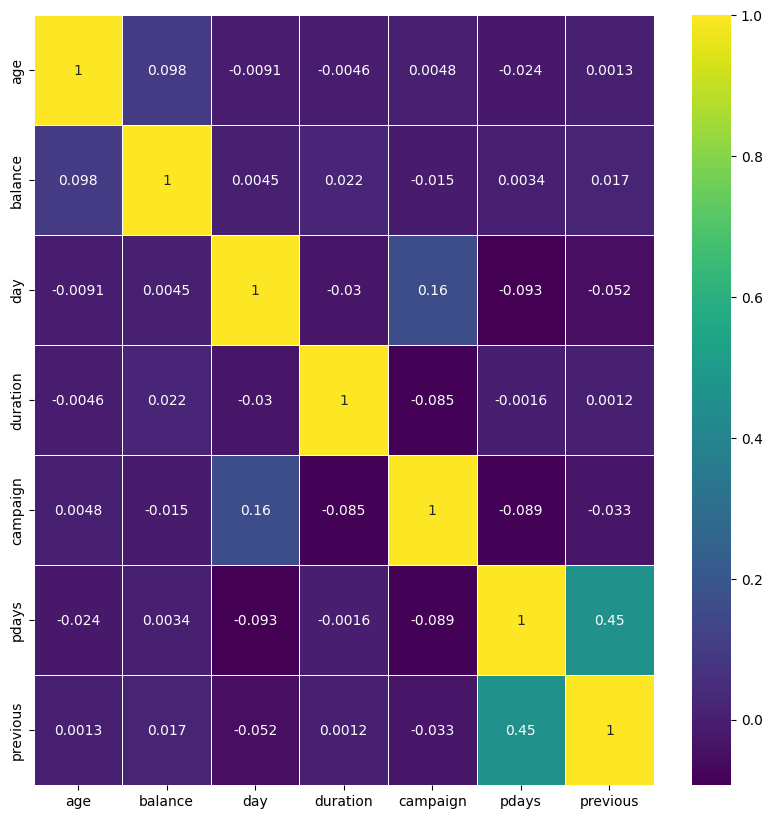

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(analisis.corr(), annot=True,cmap='viridis',linewidths=0.5,ax=ax)

# **Preprocesamiento**

## Imputación de valores faltantes

In [ ]:
nulos[nulos>0]

poutcome     36959
contact      13020
education     1857
job            288
dtype: int64

#### poutcome: Moda

In [ ]:
moda_poutcome = analisis['poutcome'].mode().values[0]
moda_poutcome

'failure'

In [ ]:
analisis['poutcome'] = analisis['poutcome'].fillna(moda_poutcome)
analisis['poutcome'].head()

0    failure
1    failure
2    failure
3    failure
4    failure
Name: poutcome, dtype: object

#### contact: Random Choice

In [ ]:
analisis['contact'].value_counts()

cellular     29285
telephone     2906
Name: contact, dtype: int64

In [ ]:
valores = analisis['contact'].value_counts().index.tolist()
valores

['cellular', 'telephone']

In [ ]:
np.random.choice(valores)

'cellular'

In [ ]:
analisis['contact'] = analisis['contact'].apply(lambda x: np.random.choice(valores) if (isinstance(x, (int, float)) and np.isnan(x)) else x)
analisis['contact']

0        telephone
1         cellular
2         cellular
3        telephone
4         cellular
           ...    
45206     cellular
45207     cellular
45208     cellular
45209    telephone
45210     cellular
Name: contact, Length: 45211, dtype: object

### Education: Moda

In [ ]:
moda_education = analisis['education'].mode().values[0]
moda_education

'secondary'

In [ ]:
analisis['education'] = analisis['education'].fillna(moda_education)
analisis['education'].head()

0     tertiary
1    secondary
2    secondary
3    secondary
4    secondary
Name: education, dtype: object

### Job: Moda

In [ ]:
analisis['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [ ]:
moda_job = analisis['job'].mode().values[0]
moda_job

'blue-collar'

In [ ]:
analisis['job'] = analisis['job'].fillna(moda_education)
analisis['job'].head()

0      management
1      technician
2    entrepreneur
3     blue-collar
4       secondary
Name: job, dtype: object

### Chequeo

In [ ]:
analisis.isnull().sum().sort_values(ascending=False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

## Codificación de variables no numéricas

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [ ]:
labelenc = LabelEncoder()

# Original

In [ ]:
analisis[category_cols]

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,telephone,may,failure,no
1,technician,single,secondary,no,yes,no,cellular,may,failure,no
2,entrepreneur,married,secondary,no,yes,yes,cellular,may,failure,no
3,blue-collar,married,secondary,no,yes,no,telephone,may,failure,no
4,secondary,single,secondary,no,no,no,cellular,may,failure,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,failure,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,failure,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,failure,no


# Transformado Con Label Encoder

In [ ]:
analisis[category_cols].apply(LabelEncoder().fit_transform)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,4,1,2,0,1,0,1,8,0,0
1,10,2,1,0,1,0,0,8,0,0
2,2,1,1,0,1,1,0,8,0,0
3,1,1,1,0,1,0,1,8,0,0
4,6,2,1,0,0,0,0,8,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,10,1,2,0,0,0,0,9,0,1
45207,5,0,0,0,0,0,0,9,0,1
45208,5,1,1,0,0,0,0,9,2,1
45209,1,1,1,0,0,0,1,9,0,0


In [ ]:
analisis[category_cols] = analisis[category_cols].apply(LabelEncoder().fit_transform)

# **División del conjunto de datos**

# Regresoras

In [ ]:
X = analisis.drop(['y','duration'],1)
X

<ipython-input-132-3e3680e88657>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = analisis.drop(['y','duration'],1)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,1,5,8,1,-1,0,0
1,44,10,2,1,0,29,1,0,0,5,8,1,-1,0,0
2,33,2,1,1,0,2,1,1,0,5,8,1,-1,0,0
3,47,1,1,1,0,1506,1,0,1,5,8,1,-1,0,0
4,33,6,2,1,0,1,0,0,0,5,8,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,10,1,2,0,825,0,0,0,17,9,3,-1,0,0
45207,71,5,0,0,0,1729,0,0,0,17,9,2,-1,0,0
45208,72,5,1,1,0,5715,0,0,0,17,9,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,4,-1,0,0


In [ ]:
y = analisis['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [ ]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
24951,58,4,1,0,0,1021,0,0,0,18,9,1,-1,0,0
22129,55,1,1,1,0,196,0,0,0,21,1,2,-1,0,0
986,50,0,1,1,0,159,1,0,0,7,8,2,-1,0,0
14999,43,4,1,0,0,1880,1,0,0,17,5,6,-1,0,0
4027,53,10,0,2,0,647,1,0,1,16,8,6,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,35,4,2,2,0,995,0,0,0,5,3,1,-1,0,0
21243,35,4,1,2,0,750,1,0,0,18,1,12,-1,0,0
42613,35,4,1,2,0,323,0,0,0,11,4,2,-1,0,0
43567,70,5,1,1,0,616,0,0,0,27,0,2,182,1,0


In [ ]:
y_train

24951    0
22129    0
986      0
14999    0
4027     0
        ..
30403    0
21243    0
42613    1
43567    0
2732     0
Name: y, Length: 31647, dtype: int64

In [ ]:
X_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
14001,37,4,1,2,0,1403,1,0,0,10,5,15,-1,0,0
32046,36,8,2,1,0,-253,1,0,0,14,0,1,-1,0,0
13318,47,1,1,0,0,-406,0,1,1,8,5,5,-1,0,0
42991,57,3,1,0,0,501,1,1,0,11,3,7,188,2,0
14237,33,1,1,1,1,-406,1,1,0,14,5,2,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,31,10,1,2,0,0,1,1,1,13,8,2,-1,0,0
35730,48,1,1,1,0,5078,1,0,1,8,8,1,-1,0,0
11495,39,3,1,2,0,4,1,1,0,19,6,1,-1,0,0
20975,42,10,1,2,0,13410,0,1,0,14,1,2,-1,0,0


In [ ]:
y_test

14001    0
32046    1
13318    0
42991    0
14237    0
        ..
2666     0
35730    0
11495    0
20975    0
31975    0
Name: y, Length: 13564, dtype: int64